In [4]:
import vtk
from glob import glob
import numpy as np
from astropy.table import Table
from scipy.signal import convolve
from astropy.convolution import Gaussian2DKernel# , convolve

In [5]:
%matplotlib inline 
from matplotlib import pyplot as plt 
from matplotlib.colors import LogNorm

In [6]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [7]:
def load_vtk_points(fn):
    points_end = -1
    mass_end = -1
    v_end = -1
    p_end = -1

    xs = []
    ms = []
    vs = []
    ps = []
    
    with open(fn) as f:
        file = f.read()
        lines = file.split('\n')

    for i, line in enumerate(lines):
        if "points" in line.lower():
            points_line = line 
            n_points = int(points_line.split(' ')[1])
            points_end = i + n_points 
            continue
        if i <= points_end:
            xs.append(np.array([float(j) for j in line.split(" ")]))

        if "mass" in line.lower():
            mass_end = i + n_points 
            continue

        if i <= mass_end:
            ms.append(float(line))

        if "velocity" in line.lower():
            v_end = i + n_points 
            continue

        if i <= v_end:
            vs.append(np.array([float(j) for j in line.split(" ")]))

        if "potential" in line.lower():
            p_end = i + n_points 
            continue

        if i <= p_end:
            ps.append(float(line))

    assert len(xs) == n_points
    assert len(ms) == n_points
    assert len(vs) == n_points
    assert len(ps) == n_points

    xs = np.array(xs)
    ms = np.array(ms)
    vs = np.array(vs) 
    ps = np.array(ps)
    
    return xs, ms, vs, ps

In [67]:
G = 1.5607939e-13 # lyr3 / (solMass yr2)
def total_pe(M, a):
    return ((-3*np.pi)/(32)) * (G*M**2)/a

In [197]:
fb = list(enumerate(natural_sort(glob('../../repo/kendrick_nbody/plummer_test_2_output/*.vtk'))[:]))

In [137]:
tpe = total_pe(1e5,50)
tpe

-9.193834968764555e-06

In [138]:
kes.sum()

9.670875659961124e-06

In [139]:
abs(pes).sum()/2

9.60473130075e-06

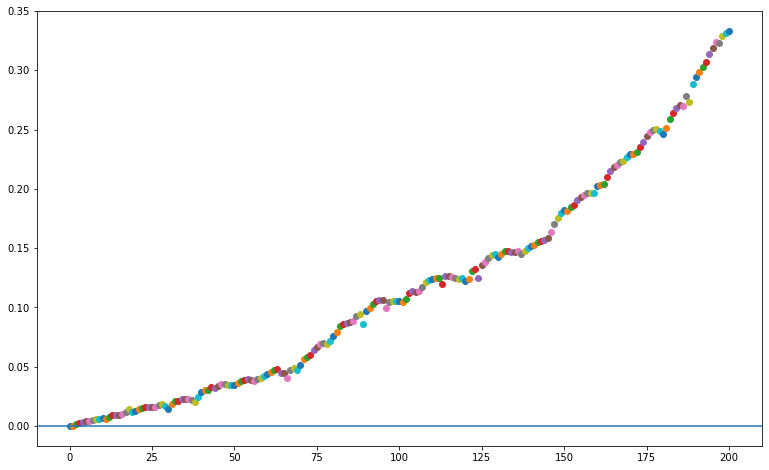

In [231]:
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

plt.axhline(tpe)
errs = []
ref_ET = None 
for t, fn in fb:
    #t = t * 10**5
#     if t == 0:
#         continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    pes = ms*ps
    kes = 0.5*ms*np.linalg.norm(vs, axis=1)**2
    #print(sum(pes)/2, tpe)
    
    ET = sum(ps)/2 + sum(kes)
    
    
    if ref_ET is None:
        ref_ET = ET
        #plt.axhline(100*abs((tpe+tpe*0.5)  - ref_ET)/abs(ref_ET))
    #print(ET, ref_ET)
    #plt.scatter(t, 100*abs(pes.sum()/2  - tpe)/abs(tpe))
    plt.scatter(t, 100*abs(ET  - ref_ET)/abs(ref_ET))
    #errs.append(100*abs(pes.sum()/2  - tpe)/abs(tpe))
    errs.append(100*abs(ET  - ref_ET)/abs(ref_ET))
    


In [233]:
tpe,ET, sum(pes)/2,  sum(kes)
tpe, sum(kes)*2

(-9.193834968764555e-06, 9.22227933772355e-06)

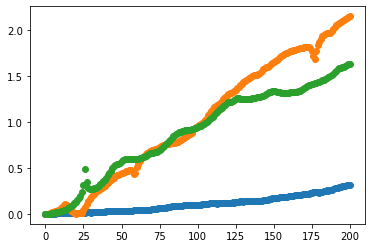

In [212]:
ts = np.array(range(len(errs)))#*100
plt.scatter(ts, errs)
plt.scatter(ts, errs2)
plt.scatter(ts, errs3)

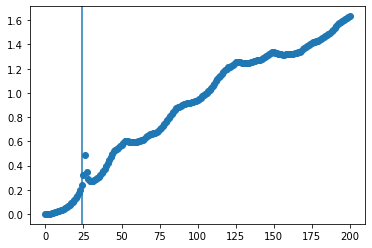

In [209]:
errs = np.array(errs)

tr = 50/np.linalg.norm(vs, axis=1).mean()

ts = np.array(range(len(errs)))#*100
plt.scatter(ts, errs)

plt.axvline(1000/6/np.log(1000))

In [240]:
0.0035909536826610566*100000000/60/60/24

4.156196391968815

In [172]:
np.linalg.norm(vs, axis=1).mean()

8.857024777735475e-06

In [168]:
300/(1000/(6*np.log(1000)))

12.433959502167845

In [170]:
50/12

4.166666666666667

In [181]:
N = 10
50/np.sqrt(G*1e5/50)*(N/(6*np.log(N)))

2048402.4560995018

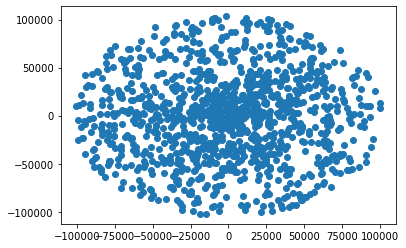

In [9]:
fb = list(enumerate(natural_sort(glob('../../repo/kendrick_nbody/test_pot_output/*.vtk'))[:]))

for i, fn in fb:
    #fn = 'mainf/mainf{}.vtk'.format(i)
    with open(fn) as f:
        file = f.read()
        tf = file
        file  =  file.split('POINTS')[1].split('CELLS')[0]

    xs = []
    ys = []
    zs = []

    for line in file.split('\n'):
        line = line.split()
        if len(line) != 3:
            continue
        x, y, z = [float(i) for i in line] 
        xs.append(x)
        ys.append(y)
        zs.append(z)


    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    
    plt.scatter(xs, ys)
    plt.show()
    break

In [10]:
tf

'# vtk DataFile Version 3.0\nvtk output\nASCII\nDATASET UNSTRUCTURED_GRID\nPOINTS 1200 float\n0.0 0.0 0.0\n16158.49 58767.47 0.0\n11426.09 11869.98 0.0\n35655.99 -19631.93 0.0\n-7802.787 14621.01 0.0\n-83637.06 38701.03 0.0\n66285.89 -493.8989 0.0\n54453.91 -26984.0 0.0\n5183.673 -42263.0 0.0\n14710.13 35713.43 0.0\n11900.72 31541.67 0.0\n-41159.02 79962.84 0.0\n53359.39 -16177.5 0.0\n26185.54 -30773.88 0.0\n81363.72 -55212.98 0.0\n-33263.69 -66922.12 0.0\n9186.43 -38014.79 0.0\n-70118.91 18043.89 0.0\n27357.64 59108.08 0.0\n24311.14 26232.49 0.0\n35542.7 -96499.09 0.0\n6795.313 -26591.23 0.0\n11549.17 -320.5384 0.0\n17250.74 -19583.09 0.0\n-61823.47 -36125.18 0.0\n-76024.84 50819.54 0.0\n81998.77 39653.59 0.0\n-12507.46 38723.16 0.0\n65387.33 -26373.27 0.0\n-31014.43 41809.07 0.0\n44985.0 16941.62 0.0\n82698.55 31525.29 0.0\n60236.2 37222.81 0.0\n-4913.345 5127.929 0.0\n-13847.97 36961.54 0.0\n-4078.208 -1838.826 0.0\n-11701.41 -2564.861 0.0\n-33765.85 -49733.71 0.0\n-32566.78 10938.8

In [12]:
tf.split('\n')

['# vtk DataFile Version 3.0',
 'vtk output',
 'ASCII',
 'DATASET UNSTRUCTURED_GRID',
 'POINTS 1200 float',
 '0.0 0.0 0.0',
 '16158.49 58767.47 0.0',
 '11426.09 11869.98 0.0',
 '35655.99 -19631.93 0.0',
 '-7802.787 14621.01 0.0',
 '-83637.06 38701.03 0.0',
 '66285.89 -493.8989 0.0',
 '54453.91 -26984.0 0.0',
 '5183.673 -42263.0 0.0',
 '14710.13 35713.43 0.0',
 '11900.72 31541.67 0.0',
 '-41159.02 79962.84 0.0',
 '53359.39 -16177.5 0.0',
 '26185.54 -30773.88 0.0',
 '81363.72 -55212.98 0.0',
 '-33263.69 -66922.12 0.0',
 '9186.43 -38014.79 0.0',
 '-70118.91 18043.89 0.0',
 '27357.64 59108.08 0.0',
 '24311.14 26232.49 0.0',
 '35542.7 -96499.09 0.0',
 '6795.313 -26591.23 0.0',
 '11549.17 -320.5384 0.0',
 '17250.74 -19583.09 0.0',
 '-61823.47 -36125.18 0.0',
 '-76024.84 50819.54 0.0',
 '81998.77 39653.59 0.0',
 '-12507.46 38723.16 0.0',
 '65387.33 -26373.27 0.0',
 '-31014.43 41809.07 0.0',
 '44985.0 16941.62 0.0',
 '82698.55 31525.29 0.0',
 '60236.2 37222.81 0.0',
 '-4913.345 5127.929 0.0',


In [363]:
ms*np.linalg.norm(vs, axis=1)**2

array([0.        , 0.02453138])

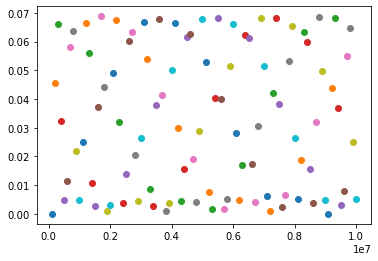

In [377]:
ref_ET  = None
for t, fn in fb:
    t = t * 10**5
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    plt.scatter(t, 100*abs(ET - ref_ET)/abs(ref_ET))

30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.0
-500000.0
-1500000000000.0
30000000000.0
10000.

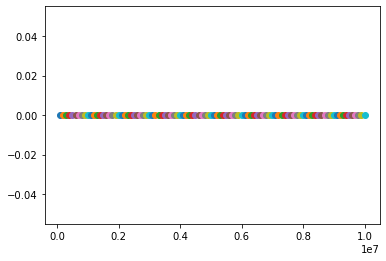

In [366]:
ref_ET  = None
ETs = []
for t, fn in fb:
    t = t * 10**5
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    ETs.append(ET)
    plt.scatter(t, 100*abs(ET - ref_ET)/abs(ref_ET))
ETs = np.array(ETs)

'../../repo/kendrick_nbody/test_small_pot_output/test_small_pot_output0.vtk'

In [371]:
G = 1.5607939e-13 # lyr3 / (solMass yr2)
xs, ms, vs, ps = load_vtk_points(fb[0][1]) 

dx, dy, dz = xs[1]
mi = ms[1]

r2 = (dx*dx)+(dy*dy)+(dz*dz)
r1 = np.sqrt(r2)
r3 = r1 * r2
        
ms[0]*G/r1, ps[1]/1.5e12

1500000000000.0
500000.0
-500000.0
-1500000000000.0


(2.425467869877482e-06, -1.0)

In [373]:
ps[1]/ms[0]

-1.0

In [278]:
np.array(ETs).std()


0.0003657385654665876

In [279]:
from astropy.modeling import models, fitting
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset


In [ ]:
plt.hist(ETs, bins=30)

ValueError: x and y must have same first dimension, but have shapes (99,) and (30,)

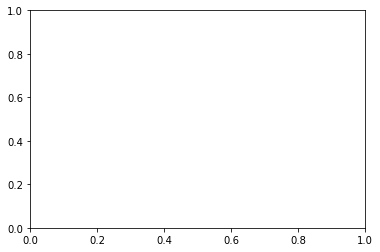

In [280]:
plt.plot(x[1:], y)

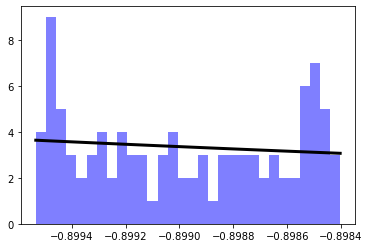

In [281]:
y,x,_ = plt.hist(ETs, bins=30, alpha=0.5, color='blue')

fitter = fitting.LevMarLSQFitter()
fitted_model = fitter( models.Gaussian1D(1, ETs.mean(), stddev=ETs.std()), x[1:], y,)

plt.plot(x, fitted_model(x), c='black', linewidth=3)

In [282]:
fitted_model

<Gaussian1D(amplitude=209.07074688, mean=-0.95385155, stddev=0.01907932)>

-9.193834968764555e-06

In [440]:
 ps.sum()

-1.8107321095899997e-07

In [441]:
ET

8.829464604635203e-06

-1.8107452342299993e-07


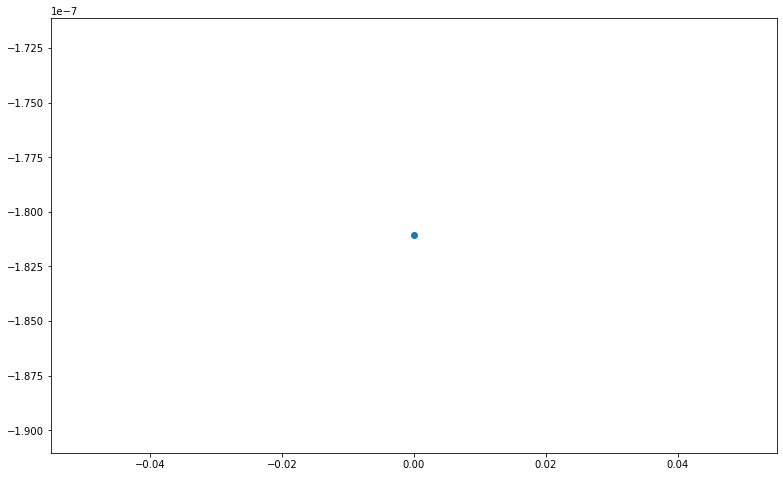

In [443]:
tpe = total_pe(1e5,50)
tpe
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

ref_ET  = None
#plt.axhline(tpe)

for t, fn in fb:
    #t = t * 10**5
#     if t == 0:
#         continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    print(sum(ps))
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    plt.scatter(t, ps.sum())
    break
ETs = np.array(ETs)


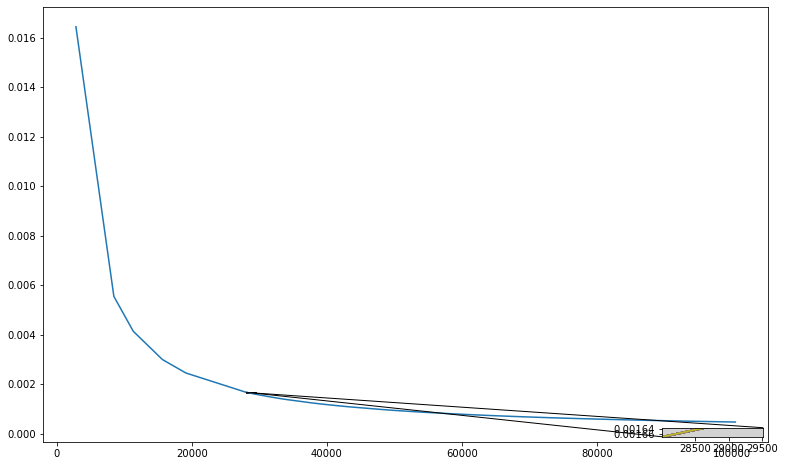

In [285]:
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

axins = None 

ref_ET  = None

for t, fn in fb:
    t = t * 10**5
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
        
    x = np.linalg.norm(xs, axis=1)
    sort_mask = x[1:].argsort()
    ps =  ms*np.linalg.norm(vs, axis=1)**2
    plt.plot(x[1:][sort_mask], ps[1:][sort_mask])
    
    if axins is None:
        axins = zoomed_inset_axes(ax,10,loc='lower right', 
                          axes_kwargs={"facecolor" : "lightgray"})
    axins.plot(x[1:][sort_mask], ps[1:][sort_mask])
    
    minx, maxx, miny, maxy = 5, 7, 5, 6
    x1,x2,y1,y2 = x[1:][sort_mask][minx],x[1:][sort_mask][maxx],  ps[1:][sort_mask][miny], ps[1:][sort_mask][maxy]
    axins.set_xlim(x1,x2)
    axins.set_ylim(y1,y2)

ETs = np.array(ETs)



pp,p1,p2 = mark_inset(ax,axins,loc1=1,loc2=3)
# pp.set_fill(True)
# pp.set_facecolor("lightgray")
# pp.set_edgecolor("k")

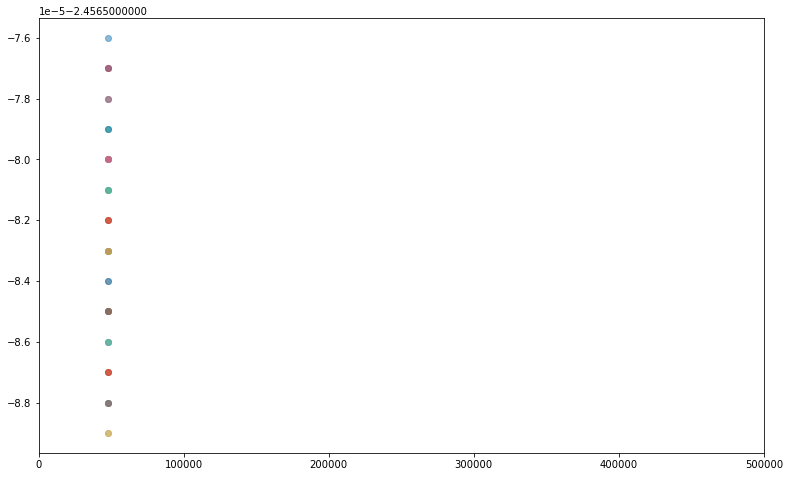

In [323]:
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

axins = None 
zoom = 30
ref_ET  = None
ETs = []

for t, fn in fb[:50]:
    t = t
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    x = np.linalg.norm(xs, axis=1)
    sort_mask = x[1:].argsort()
    
    #ps =  ms*np.linalg.norm(vs, axis=1)**2
    
    ax.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o', alpha=0.5)
            #markeredgewidth=10*(1-t/len(fb)), markerfacecolor=None)
#     if axins is None:
#         axins = zoomed_inset_axes(ax,zoom,loc='lower right', 
#                           axes_kwargs={"facecolor" : "lightgray"})
    #axins.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o')
    
    #minx, maxx, miny, maxy = 6, 6, 6, 6
    #x1,x2,y1,y2 = x[1:][sort_mask][minx]*0.97,x[1:][sort_mask][maxx]*1.03, ps[1:][sort_mask][miny]*1.01, ps[1:][sort_mask][maxy]*0.99
    #axins.set_xlim(x1,x2)
    #axins.set_ylim(y1,y2)

#axins.set_title('Zoom in Window (x{})'.format(zoom) , pad=15)

ax.set_xlim(-1, 5e5)
ETs = np.array(ETs)
#pp,p1,p2 = mark_inset(ax,axins,loc1=1,loc2=3, alpha=0.5)

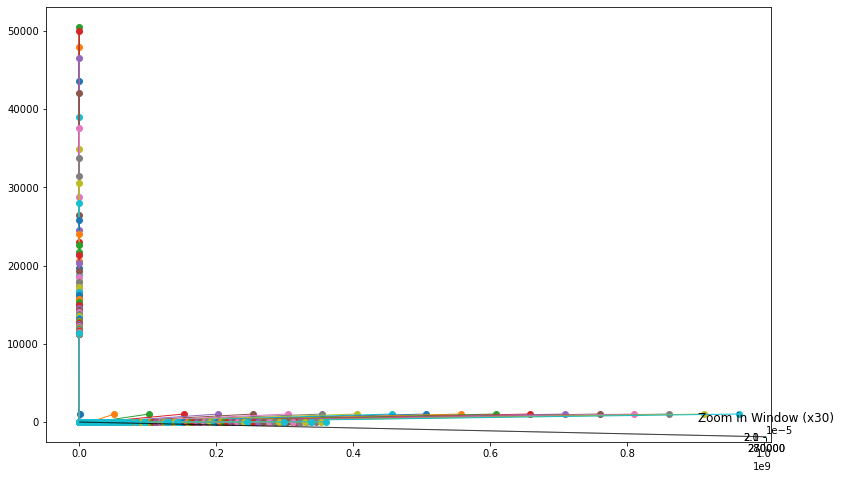

In [302]:
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

axins = None 
zoom = 30
ref_ET  = None
ETs = []

for t, fn in fb:
    t = t
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    x = np.linalg.norm(xs, axis=1)
    sort_mask = x[1:].argsort()
    
    ps =  ms*np.linalg.norm(vs, axis=1)**2
    
    ax.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o')
            #markeredgewidth=10*(1-t/len(fb)), markerfacecolor=None)
    if axins is None:
        axins = zoomed_inset_axes(ax,zoom,loc='lower right', 
                          axes_kwargs={"facecolor" : "lightgray"})
    axins.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o')
    
    minx, maxx, miny, maxy = 6, 6, 6, 6
    x1,x2,y1,y2 = x[1:][sort_mask][minx]*0.97,x[1:][sort_mask][maxx]*1.03, ps[1:][sort_mask][miny]*0.97, ps[1:][sort_mask][maxy]*1.03
    axins.set_xlim(x1,x2)
    axins.set_ylim(y1,y2)

axins.set_title('Zoom in Window (x{})'.format(zoom) , pad=15)
    
ETs = np.array(ETs)
pp,p1,p2 = mark_inset(ax,axins,loc1=1,loc2=3, alpha=0.5)

In [274]:
(np.arctan(np.sqrt(3)/-1) *180/np.pi ) % 360

300.0

In [ ]:
fig = plt.figure(figsize = (13,8))

ax = plt.gca()

axins = None 
zoom = 30
ref_ET  = None
ETs = []

for t, fn in fb[:50]:
    t = t
    if t == 0:
        continue
    xs, ms, vs, ps = load_vtk_points(fn) 
    
    ET = sum(ps + ms*np.linalg.norm(vs, axis=1)**2)
    if ref_ET is None:
        ref_ET = ET
    x = np.linalg.norm(xs, axis=1)
    sort_mask = x[1:].argsort()
    
    #ps =  ms*np.linalg.norm(vs, axis=1)**2
    
    ax.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o', alpha=0.5)
            #markeredgewidth=10*(1-t/len(fb)), markerfacecolor=None)
#     if axins is None:
#         axins = zoomed_inset_axes(ax,zoom,loc='lower right', 
#                           axes_kwargs={"facecolor" : "lightgray"})
    #axins.plot(x[1:][sort_mask], ps[1:][sort_mask], linewidth=1, marker='o')
    
    #minx, maxx, miny, maxy = 6, 6, 6, 6
    #x1,x2,y1,y2 = x[1:][sort_mask][minx]*0.97,x[1:][sort_mask][maxx]*1.03, ps[1:][sort_mask][miny]*1.01, ps[1:][sort_mask][maxy]*0.99
    #axins.set_xlim(x1,x2)
    #axins.set_ylim(y1,y2)

#axins.set_title('Zoom in Window (x{})'.format(zoom) , pad=15)

ax.set_xlim(-1, 5e5)
ETs = np.array(ETs)
#pp,p1,p2 = mark_inset(ax,axins,loc1=1,loc2=3, alpha=0.5)